In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime
from ipywidgets import interact,interact_manual

In [2]:
URL = "https://www.boxofficemojo.com/genre/sg2245914881/?offset=200"
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36"} 
webpage = requests.get(URL,headers=headers)

webpage.text

'<!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);\n\n\n    var ue_err_chan = \'jserr-rw\';\n(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c

In [126]:
data = BeautifulSoup(webpage.text)
data

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr-rw';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!

In [128]:
doc_name = data.find_all('td',class_='a-text-left mojo-field-type-title')
(doc_name[0].text)
    
lifegross = data.find_all('td',class_='a-text-right mojo-field-type-money mojo-sort-column mojo-estimatable')
lifegross[0].text

'$1,134,623'

In [129]:
%%time
Titles =[]
Lifetime_Gross=[]
Rank=[]
Max_theaters=[]
Opening_col =[]
Opening_theaters=[]
Release_date=[]
Distributor=[]

for i in range(0,2100,100):
    url ='https://www.boxofficemojo.com/genre/sg2245914881/?offset={}'.format(i)
    

    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36"} 
    webpage = requests.get(url,headers=headers)
    data =BeautifulSoup(webpage.text)
    
    #Titles
    doc_name = data.find_all('td',class_='a-text-left mojo-field-type-title')
    for name in doc_name:
        Titles.append(name.text)
        
    
    #Lifetime_Gross
    lifegross = data.find_all('td',class_='a-text-right mojo-field-type-money mojo-sort-column mojo-estimatable')
    for i in lifegross:
        Lifetime_Gross.append(i.text)
        
    #Rank
    rank = data.find_all('td',class_='a-text-right mojo-header-column mojo-truncate mojo-field-type-rank')
    for i in rank:
        Rank.append(i.text)
            
        
    #Max_theaters
    maxth = data.find('td',class_='a-text-right mojo-field-type-positive_integer')
    for i in maxth:
        Max_theaters.append(i.text)
       
        
        
    #Opening_col
    opening = data.find_all('td',class_='a-text-right mojo-field-type-money')
    for course in opening:
        Opening_col.append(course.text)
    
        
    #Opening_theaters
    openth = data.find_all('td',class_='a-text-right mojo-field-type-positive_integer')
    for name in openth:
        Opening_theaters.append(name.text)
        
    #Release_date
    Releasedate = data.find_all('td',class_='a-text-left mojo-field-type-date a-nowrap')
    for i in Releasedate:
        Release_date.append(i.text)
        
    #Distributor
    distributor = data.find_all('td',class_='a-text-left mojo-field-type-release_studios')
    for i in distributor:
        Distributor.append(i.text)
    

CPU times: total: 4.3 s
Wall time: 58 s


In [130]:
print(len(Titles)) 
print(len(Lifetime_Gross))
print(len(Rank))
print('Max_Th:',len(Max_theaters))
print(len(Opening_col))
print('opening_th:',len(Opening_theaters))
print(len(Release_date))
print('distributor:',len(Distributor))

2055
2055
2055
Max_Th: 21
2055
opening_th: 4110
2055
distributor: 2055


# Creating DataFrame

In [131]:
documentries =pd.DataFrame({'Titles':Titles,'Lifetime_Gross':Lifetime_Gross,'Max_theaters':Opening_theaters[::2],'Opening_col':Opening_col,'Opening_theaters':Opening_theaters[1::2],'Release_date':Release_date,'Distributor':Distributor,'Rank':Rank})
documentries

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,"$119,194,771","2,011","$23,920,637",868,"Jun 23, 2004",Lionsgate\n\n,1
1,March of the Penguins,"$77,437,223","2,506","$137,492",4,"Jun 24, 2005",Warner Independent Pictures (WIP)\n\n,2
2,Justin Bieber: Never Say Never,"$73,013,910","3,118","$29,514,054","3,105","Feb 11, 2011",Paramount Pictures\n\n,3
3,This Is It,"$72,091,016","3,481","$23,234,394","3,481","Oct 28, 2009",Sony Pictures Entertainment (SPE)\n\n,4
4,Under the Sea 3D,"$36,262,926",108,"$661,185",49,"Feb 13, 2009",Warner Bros.\n\n,5
...,...,...,...,...,...,...,...,...
2050,Notes on Marie Menken,$577,1,$577,1,"Feb 9, 2007",Icarus Films\n\n,"2,051"
2051,A Good Day to Die,$573,1,-,-,"Nov 4, 2011",-,"2,052"
2052,Back to Normandy,$503,1,-,-,"Jul 30, 2008",Kino International\n\n,"2,053"
2053,Triumph of the Wall,$476,1,$430,1,"May 31, 2013",First Run\n\n,"2,054"


In [132]:
Opening_theaters1 = Opening_theaters
print(len(Opening_theaters1))

Max_theaters =Opening_theaters[::2]
print(len(Max_theaters))

Opening_theaters2 =Opening_theaters[1::2]
print(len(Opening_theaters2))

4110
2055
2055


In [ ]:
documentries.to_csv('documentriesfinal3.csv',index=False)

### Data cleaning

In [133]:
dataf = pd.read_csv('documentriesfinal3.csv')

In [134]:
dataf

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,"$119,194,771","2,011","$23,920,637",868,"Jun 23, 2004",Lionsgate\n\n,1
1,March of the Penguins,"$77,437,223","2,506","$137,492",4,"Jun 24, 2005",Warner Independent Pictures (WIP)\n\n,2
2,Justin Bieber: Never Say Never,"$73,013,910","3,118","$29,514,054","3,105","Feb 11, 2011",Paramount Pictures\n\n,3
3,This Is It,"$72,091,016","3,481","$23,234,394","3,481","Oct 28, 2009",Sony Pictures Entertainment (SPE)\n\n,4
4,Under the Sea 3D,"$36,262,926",108,"$661,185",49,"Feb 13, 2009",Warner Bros.\n\n,5
...,...,...,...,...,...,...,...,...
2050,Notes on Marie Menken,$577,1,$577,1,"Feb 9, 2007",Icarus Films\n\n,"2,051"
2051,A Good Day to Die,$573,1,-,-,"Nov 4, 2011",-,"2,052"
2052,Back to Normandy,$503,1,-,-,"Jul 30, 2008",Kino International\n\n,"2,053"
2053,Triumph of the Wall,$476,1,$430,1,"May 31, 2013",First Run\n\n,"2,054"


In [135]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Titles            2055 non-null   object
 1   Lifetime_Gross    2055 non-null   object
 2   Max_theaters      2055 non-null   object
 3   Opening_col       2055 non-null   object
 4   Opening_theaters  2055 non-null   object
 5   Release_date      2055 non-null   object
 6   Distributor       2055 non-null   object
 7   Rank              2055 non-null   object
dtypes: object(8)
memory usage: 128.6+ KB


### replacing missing data with nan

In [136]:
dataf.replace('-',np.nan, inplace=True)
dataf

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,"$119,194,771","2,011","$23,920,637",868,"Jun 23, 2004",Lionsgate\n\n,1
1,March of the Penguins,"$77,437,223","2,506","$137,492",4,"Jun 24, 2005",Warner Independent Pictures (WIP)\n\n,2
2,Justin Bieber: Never Say Never,"$73,013,910","3,118","$29,514,054","3,105","Feb 11, 2011",Paramount Pictures\n\n,3
3,This Is It,"$72,091,016","3,481","$23,234,394","3,481","Oct 28, 2009",Sony Pictures Entertainment (SPE)\n\n,4
4,Under the Sea 3D,"$36,262,926",108,"$661,185",49,"Feb 13, 2009",Warner Bros.\n\n,5
...,...,...,...,...,...,...,...,...
2050,Notes on Marie Menken,$577,1,$577,1,"Feb 9, 2007",Icarus Films\n\n,"2,051"
2051,A Good Day to Die,$573,1,NaN,NaN,"Nov 4, 2011",NaN,"2,052"
2052,Back to Normandy,$503,1,NaN,NaN,"Jul 30, 2008",Kino International\n\n,"2,053"
2053,Triumph of the Wall,$476,1,$430,1,"May 31, 2013",First Run\n\n,"2,054"


In [50]:
dataf.dropna(inplace=True)
dataf

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,"$119,194,771","2,011","$23,920,637",868,"Jun 23, 2004",Lionsgate\n\n,1
1,March of the Penguins,"$77,437,223","2,506","$137,492",4,"Jun 24, 2005",Warner Independent Pictures (WIP)\n\n,2
2,Justin Bieber: Never Say Never,"$73,013,910","3,118","$29,514,054","3,105","Feb 11, 2011",Paramount Pictures\n\n,3
3,This Is It,"$72,091,016","3,481","$23,234,394","3,481","Oct 28, 2009",Sony Pictures Entertainment (SPE)\n\n,4
4,Under the Sea 3D,"$36,262,926",108,"$661,185",49,"Feb 13, 2009",Warner Bros.\n\n,5
...,...,...,...,...,...,...,...,...
2047,TVTV: Video Revolutionaries,$812,1,$556,1,"Oct 19, 2018",First Run\n\n,"2,048"
2048,"Jesus, You Know",$604,1,$604,1,"Dec 3, 2004",Leisure Time Features\n\n,"2,049"
2049,Gottfried Helnwein and the Dreaming Child,$601,1,$402,1,"Nov 23, 2012",First Run\n\n,"2,050"
2050,Notes on Marie Menken,$577,1,$577,1,"Feb 9, 2007",Icarus Films\n\n,"2,051"


### Applying functions to remove symbols and commas

In [154]:
def digits(x):
    reg = re.findall('\d',str(x).replace(',',''))
    return int(''.join(reg))
def digits1(x):
    reg = re.findall('\d',str(x).replace(',',''))
    return (''.join(reg))

dataf['Lifetime_Gross']=dataf['Lifetime_Gross'].apply(digits)
dataf['Rank']=dataf['Rank'].apply(digits)
dataf['Max_theaters']=dataf['Max_theaters'].apply(digits1)

In [155]:
dataf['Opening_theaters']=dataf['Opening_theaters'].apply(digits1)

In [145]:
dataf

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011,23920637,868,"Jun 23, 2004",Lionsgate\n\n,1
1,March of the Penguins,77437223,2506,137492,4,"Jun 24, 2005",Warner Independent Pictures (WIP)\n\n,2
2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,"Feb 11, 2011",Paramount Pictures\n\n,3
3,This Is It,72091016,3481,23234394,3481,"Oct 28, 2009",Sony Pictures Entertainment (SPE)\n\n,4
4,Under the Sea 3D,36262926,108,661185,49,"Feb 13, 2009",Warner Bros.\n\n,5
...,...,...,...,...,...,...,...,...
2050,Notes on Marie Menken,577,1,577,1,"Feb 9, 2007",Icarus Films\n\n,2051
2051,A Good Day to Die,573,1,,,"Nov 4, 2011",NaN,2052
2052,Back to Normandy,503,1,,,"Jul 30, 2008",Kino International\n\n,2053
2053,Triumph of the Wall,476,1,430,1,"May 31, 2013",First Run\n\n,2054


In [146]:
def extrachar(x):
    reg =re.findall('[^\\n\\n]',str(x))
    return ''.join(reg)

dataf['Distributor'].apply(extrachar)

0                               Lionsgate
1       Warner Independent Pictures (WIP)
2                      Paramount Pictures
3       Sony Pictures Entertainment (SPE)
4                            Warner Bros.
                      ...                
2050                         Icarus Films
2051                                  nan
2052                   Kino International
2053                            First Run
2054                          Kino Lorber
Name: Distributor, Length: 2055, dtype: object

In [147]:
dataf['Distributor'] =dataf['Distributor'].apply(extrachar)

In [148]:
dataf['Release_date'] =pd.to_datetime(dataf['Release_date'])

In [149]:
dataf.to_csv('documentriesfinal4.csv',index =False)

In [151]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Titles            2055 non-null   object        
 1   Lifetime_Gross    2055 non-null   int64         
 2   Max_theaters      2055 non-null   object        
 3   Opening_col       2055 non-null   object        
 4   Opening_theaters  2055 non-null   object        
 5   Release_date      2055 non-null   datetime64[ns]
 6   Distributor       2055 non-null   object        
 7   Rank              2055 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 128.6+ KB


In [58]:
dataf.describe().T

,count,mean,std,min,25%,50%,75%,max
Lifetime_Gross,1696.0,899898.941038,5.074971e+06,476.0,15367.75,55403.5,250133.00,119194771.0
Max_theaters,1696.0,58.717571,2.445674e+02,1.0,2.00,6.0,21.00,3481.0
Opening_col,1696.0,141330.227594,1.267389e+06,151.0,3635.75,7992.0,20650.25,29514054.0
Opening_theaters,1696.0,34.547170,2.174895e+02,1.0,1.00,1.0,3.00,3481.0
Rank,1696.0,1020.521226,5.950768e+02,1.0,504.75,1014.5,1533.25,2054.0


In [36]:
dataf = pd.read_csv('documentriesfinal4.csv')

# Univariate Analysis

In [61]:
data = dataf
data

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011,23920637,868,2004-06-23,Lionsgate,1
1,March of the Penguins,77437223,2506,137492,4,2005-06-24,Warner Independent Pictures (WIP),2
2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,2011-02-11,Paramount Pictures,3
3,This Is It,72091016,3481,23234394,3481,2009-10-28,Sony Pictures Entertainment (SPE),4
4,Under the Sea 3D,36262926,108,661185,49,2009-02-13,Warner Bros.,5
...,...,...,...,...,...,...,...,...
2047,TVTV: Video Revolutionaries,812,1,556,1,2018-10-19,First Run,2048
2048,"Jesus, You Know",604,1,604,1,2004-12-03,Leisure Time Features,2049
2049,Gottfried Helnwein and the Dreaming Child,601,1,402,1,2012-11-23,First Run,2050
2050,Notes on Marie Menken,577,1,577,1,2007-02-09,Icarus Films,2051


In [62]:
data[['Lifetime_Gross','Max_theaters']].skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       Lifetime_Gross  Max_theaters
0          119194771          2011
1           77437223          2506
2           73013910          3118
3           72091016          3481
4           36262926           108
...              ...           ...
2047             812             1
2048             604             1
2049             601             1
2050             577             1
2053             476             1

[1696 rows x 2 columns]>

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

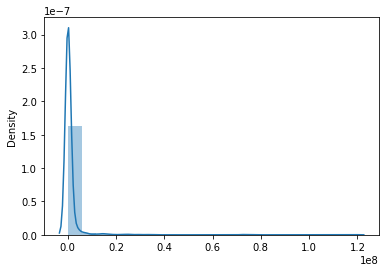

In [63]:
sns.distplot(data[['Lifetime_Gross']],bins=20)

In [64]:
data

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011,23920637,868,2004-06-23,Lionsgate,1
1,March of the Penguins,77437223,2506,137492,4,2005-06-24,Warner Independent Pictures (WIP),2
2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,2011-02-11,Paramount Pictures,3
3,This Is It,72091016,3481,23234394,3481,2009-10-28,Sony Pictures Entertainment (SPE),4
4,Under the Sea 3D,36262926,108,661185,49,2009-02-13,Warner Bros.,5
...,...,...,...,...,...,...,...,...
2047,TVTV: Video Revolutionaries,812,1,556,1,2018-10-19,First Run,2048
2048,"Jesus, You Know",604,1,604,1,2004-12-03,Leisure Time Features,2049
2049,Gottfried Helnwein and the Dreaming Child,601,1,402,1,2012-11-23,First Run,2050
2050,Notes on Marie Menken,577,1,577,1,2007-02-09,Icarus Films,2051


In [68]:
data.drop_duplicates(inplace=True)

In [71]:
data

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011,23920637,868,2004-06-23,Lionsgate,1
1,March of the Penguins,77437223,2506,137492,4,2005-06-24,Warner Independent Pictures (WIP),2
2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,2011-02-11,Paramount Pictures,3
3,This Is It,72091016,3481,23234394,3481,2009-10-28,Sony Pictures Entertainment (SPE),4
4,Under the Sea 3D,36262926,108,661185,49,2009-02-13,Warner Bros.,5
...,...,...,...,...,...,...,...,...
2047,TVTV: Video Revolutionaries,812,1,556,1,2018-10-19,First Run,2048
2048,"Jesus, You Know",604,1,604,1,2004-12-03,Leisure Time Features,2049
2049,Gottfried Helnwein and the Dreaming Child,601,1,402,1,2012-11-23,First Run,2050
2050,Notes on Marie Menken,577,1,577,1,2007-02-09,Icarus Films,2051


In [73]:
data.isnull().sum()

Titles              0
Lifetime_Gross      0
Max_theaters        0
Opening_col         0
Opening_theaters    0
Release_date        0
Distributor         0
Rank                0
dtype: int64

In [74]:
data.reset_index()

,index,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,0,Fahrenheit 9/11,119194771,2011,23920637,868,2004-06-23,Lionsgate,1
1,1,March of the Penguins,77437223,2506,137492,4,2005-06-24,Warner Independent Pictures (WIP),2
2,2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,2011-02-11,Paramount Pictures,3
3,3,This Is It,72091016,3481,23234394,3481,2009-10-28,Sony Pictures Entertainment (SPE),4
4,4,Under the Sea 3D,36262926,108,661185,49,2009-02-13,Warner Bros.,5
...,...,...,...,...,...,...,...,...,...
1691,2047,TVTV: Video Revolutionaries,812,1,556,1,2018-10-19,First Run,2048
1692,2048,"Jesus, You Know",604,1,604,1,2004-12-03,Leisure Time Features,2049
1693,2049,Gottfried Helnwein and the Dreaming Child,601,1,402,1,2012-11-23,First Run,2050
1694,2050,Notes on Marie Menken,577,1,577,1,2007-02-09,Icarus Films,2051


In [77]:
data

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011,23920637,868,2004-06-23,Lionsgate,1
1,March of the Penguins,77437223,2506,137492,4,2005-06-24,Warner Independent Pictures (WIP),2
2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,2011-02-11,Paramount Pictures,3
3,This Is It,72091016,3481,23234394,3481,2009-10-28,Sony Pictures Entertainment (SPE),4
4,Under the Sea 3D,36262926,108,661185,49,2009-02-13,Warner Bros.,5
...,...,...,...,...,...,...,...,...
2047,TVTV: Video Revolutionaries,812,1,556,1,2018-10-19,First Run,2048
2048,"Jesus, You Know",604,1,604,1,2004-12-03,Leisure Time Features,2049
2049,Gottfried Helnwein and the Dreaming Child,601,1,402,1,2012-11-23,First Run,2050
2050,Notes on Marie Menken,577,1,577,1,2007-02-09,Icarus Films,2051


In [6]:
data = pd.read_csv('documentriesfinal4.csv',index_col=None)

In [7]:
data['Release_date']= pd.to_datetime(data['Release_date'])
data

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011.0,23920637.0,868.0,2004-06-23,Lionsgate,1
1,March of the Penguins,77437223,2506.0,137492.0,4.0,2005-06-24,Warner Independent Pictures (WIP),2
2,Justin Bieber: Never Say Never,73013910,3118.0,29514054.0,3105.0,2011-02-11,Paramount Pictures,3
3,This Is It,72091016,3481.0,23234394.0,3481.0,2009-10-28,Sony Pictures Entertainment (SPE),4
4,Under the Sea 3D,36262926,108.0,661185.0,49.0,2009-02-13,Warner Bros.,5
...,...,...,...,...,...,...,...,...
2050,Notes on Marie Menken,577,1.0,577.0,1.0,2007-02-09,Icarus Films,2051
2051,A Good Day to Die,573,1.0,NaN,NaN,2011-11-04,NaN,2052
2052,Back to Normandy,503,1.0,NaN,NaN,2008-07-30,Kino International,2053
2053,Triumph of the Wall,476,1.0,430.0,1.0,2013-05-31,First Run,2054


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Titles            2055 non-null   object        
 1   Lifetime_Gross    2055 non-null   int64         
 2   Max_theaters      2033 non-null   float64       
 3   Opening_col       1822 non-null   float64       
 4   Opening_theaters  1823 non-null   float64       
 5   Release_date      2055 non-null   datetime64[ns]
 6   Distributor       1894 non-null   object        
 7   Rank              2055 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 128.6+ KB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lifetime_Gross,1696.0,899898.941038,5.074971e+06,476.0,15367.75,55403.5,250133.00,119194771.0
Max_theaters,1696.0,58.717571,2.445674e+02,1.0,2.00,6.0,21.00,3481.0
Opening_col,1696.0,141330.227594,1.267389e+06,151.0,3635.75,7992.0,20650.25,29514054.0
Opening_theaters,1696.0,34.547170,2.174895e+02,1.0,1.00,1.0,3.00,3481.0
Rank,1696.0,1020.521226,5.950768e+02,1.0,504.75,1014.5,1533.25,2054.0


In [6]:
data.nunique()

Titles              1695
Lifetime_Gross      1682
Max_theaters         217
Opening_col         1628
Opening_theaters     117
Release_date        1046
Distributor          262
Rank                1682
dtype: int64

In [7]:
data.head()

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011,23920637,868,2004-06-23,Lionsgate,1
1,March of the Penguins,77437223,2506,137492,4,2005-06-24,Warner Independent Pictures (WIP),2
2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,2011-02-11,Paramount Pictures,3
3,This Is It,72091016,3481,23234394,3481,2009-10-28,Sony Pictures Entertainment (SPE),4
4,Under the Sea 3D,36262926,108,661185,49,2009-02-13,Warner Bros.,5


In [179]:
Q1 = data['Max_theaters'].quantile(0.25)
Q3 = data['Max_theaters'].quantile(0.75)
iqr = Q3 - Q1

lb = Q1 - (1.5*iqr)
ub = Q3 + (1.5*iqr)
outlier_length = len(data[((data['Max_theaters']<lb) | (data['Max_theaters']>ub))])
Q1,Q3,iqr,lb,ub,outlier_length

(2.0, 21.0, 19.0, -26.5, 49.5, 245)

In [180]:
def outliers_data(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1

    lb = Q1 - (1.5*iqr)
    ub = Q3 + (1.5*iqr)
    outliers = (data[((data[col]<lb) | (data[col]>ub))][col])
    outliers_length =len(outliers)
    print('outlier_length:',outlier_length)
    print('outliers:',outliers)
    
    

In [183]:
outliers_data(data,'Lifetime_Gross')

outlier_length: 245
outliers: 0      119194771
1       77437223
2       73013910
3       72091016
4       36262926
         ...    
248       613956
249       612192
250       607844
251       607290
252       603894
Name: Lifetime_Gross, Length: 253, dtype: int64


In [30]:
dataf =data.head(500).sort_values('Lifetime_Gross',ascending=False)

In [31]:
dataf

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011,23920637,868,2004-06-23,Lionsgate,1
1,March of the Penguins,77437223,2506,137492,4,2005-06-24,Warner Independent Pictures (WIP),2
2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,2011-02-11,Paramount Pictures,3
3,This Is It,72091016,3481,23234394,3481,2009-10-28,Sony Pictures Entertainment (SPE),4
4,Under the Sea 3D,36262926,108,661185,49,2009-02-13,Warner Bros.,5
...,...,...,...,...,...,...,...,...
495,Whose Streets?,182799,39,43804,24,2017-08-11,Magnolia Pictures,596
496,Winnebago Man,181039,12,16469,2,2010-07-09,Kino International,597
497,An Honest Liar,180590,15,13821,2,2015-03-06,Abramorama,598
498,Chop Suey,179914,5,10472,1,2001-10-05,Zeitgeist Films,599


In [32]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Titles            500 non-null    object        
 1   Lifetime_Gross    500 non-null    int64         
 2   Max_theaters      500 non-null    int64         
 3   Opening_col       500 non-null    int64         
 4   Opening_theaters  500 non-null    int64         
 5   Release_date      500 non-null    datetime64[ns]
 6   Distributor       500 non-null    object        
 7   Rank              500 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 35.2+ KB


In [38]:
dataf.describe().T

,count,mean,std,min,25%,50%,75%,max
Lifetime_Gross,500.0,2946073.154,9.029482e+06,179780.0,302345.50,610018.0,1676799.50,119194771.0
Max_theaters,500.0,182.366,4.250194e+02,1.0,19.00,39.5,112.75,3481.0
Opening_col,500.0,459432.212,2.304800e+06,379.0,16991.25,31939.5,89615.50,29514054.0
Opening_theaters,500.0,108.376,3.902167e+02,1.0,2.00,3.0,11.25,3481.0
Rank,500.0,296.598,1.741003e+02,1.0,144.75,301.5,443.25,600.0


In [102]:
data['Release_date']= pd.to_datetime(data['Release_date'])

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Titles            1696 non-null   object        
 1   Lifetime_Gross    1696 non-null   int64         
 2   Max_theaters      1696 non-null   int64         
 3   Opening_col       1696 non-null   int64         
 4   Opening_theaters  1696 non-null   int64         
 5   Release_date      1696 non-null   datetime64[ns]
 6   Distributor       1696 non-null   object        
 7   Rank              1696 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 106.1+ KB


In [45]:
data.nunique()

Titles              1695
Lifetime_Gross      1682
Max_theaters         217
Opening_col         1628
Opening_theaters     117
Release_date        1046
Distributor          262
Rank                1682
dtype: int64

In [54]:
data.describe(include='object')

,Titles,Distributor
count,1696,1696
unique,1695,262
top,Happy Valley,First Run
freq,2,173


In [60]:
pd.crosstab(data['Distributor'],data['Release_date'])

Release_date,1981-04-10,1984-10-26,1985-01-18,1986-01-31,1986-11-07,1988-04-22,1988-04-29,1988-06-03,1988-08-19,1988-08-26,...,2019-10-25,2019-11-08,2019-11-15,2019-11-22,2019-12-06,2019-12-13,2020-01-31,2020-02-14,2020-02-21,2020-08-14
Distributor,,,,,,,,,,,,,,,,,,,,,
1091 Pictures,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26 Aries,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4th Row Films,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8x Entertainment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worldplay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XLrator Media,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zeitgeist Films,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
data =pd.read_csv('documentriesfinal4.csv',index_col=None)
data['Release_date']= pd.to_datetime(data['Release_date'])
data.to_csv('documentriesfinal5.csv',index=False)

In [3]:
data =pd.read_csv('documentriesfinal5.csv',index_col=None)

In [4]:
data['Release_date']= pd.to_datetime(data['Release_date'])

In [5]:
data

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011,23920637,868,2004-06-23,Lionsgate,1
1,March of the Penguins,77437223,2506,137492,4,2005-06-24,Warner Independent Pictures (WIP),2
2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,2011-02-11,Paramount Pictures,3
3,This Is It,72091016,3481,23234394,3481,2009-10-28,Sony Pictures Entertainment (SPE),4
4,Under the Sea 3D,36262926,108,661185,49,2009-02-13,Warner Bros.,5
...,...,...,...,...,...,...,...,...
1691,TVTV: Video Revolutionaries,812,1,556,1,2018-10-19,First Run,2048
1692,"Jesus, You Know",604,1,604,1,2004-12-03,Leisure Time Features,2049
1693,Gottfried Helnwein and the Dreaming Child,601,1,402,1,2012-11-23,First Run,2050
1694,Notes on Marie Menken,577,1,577,1,2007-02-09,Icarus Films,2051


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lifetime_Gross,1696.0,899898.941038,5.074971e+06,476.0,15367.75,55403.5,250133.00,119194771.0
Max_theaters,1696.0,58.717571,2.445674e+02,1.0,2.00,6.0,21.00,3481.0
Opening_col,1696.0,141330.227594,1.267389e+06,151.0,3635.75,7992.0,20650.25,29514054.0
Opening_theaters,1696.0,34.547170,2.174895e+02,1.0,1.00,1.0,3.00,3481.0
Rank,1696.0,1020.521226,5.950768e+02,1.0,504.75,1014.5,1533.25,2054.0


<AxesSubplot:xlabel='Opening_col', ylabel='Count'>

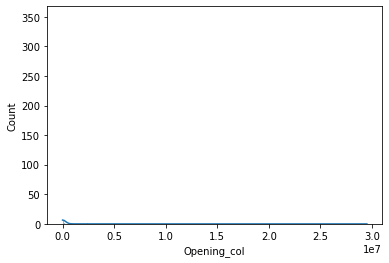

In [6]:
sns.histplot(data['Opening_col'],kde =True)

In [8]:
dist_data =data.groupby(by='Distributor').sum()[['Lifetime_Gross','Max_theaters','Opening_col','Opening_theaters']]
dist_data.sort_values('Lifetime_Gross',ascending=False)
dist_data

,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters
Distributor,,,,
1091 Pictures,294147,55,21158,3
26 Aries,9522,1,7500,1
4th Row Films,117470,14,6650,1
8x Entertainment,741557,221,309455,221
A24,8821248,560,269735,23
...,...,...,...,...
Worldplay,118206,21,4996,1
XLrator Media,117090,7,7299,2
Zeitgeist Films,11402675,451,496216,69


<AxesSubplot:xlabel='Max_theaters', ylabel='count'>

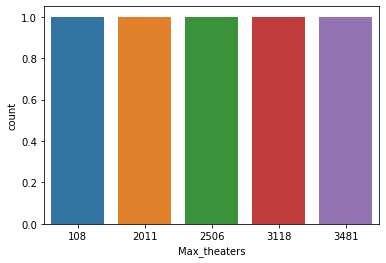

In [172]:
sns.countplot(data =data.head(5),x='Max_theaters')

<AxesSubplot:>

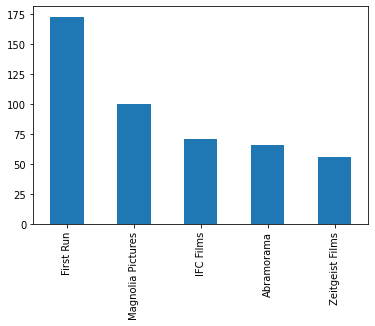

In [171]:
data['Distributor'].value_counts().head().plot.bar()

In [7]:
data["Distributor"].value_counts().head(10)

First Run                 173
Magnolia Pictures         100
IFC Films                  71
Abramorama                 66
Zeitgeist Films            56
Sony Pictures Classics     49
Oscilloscope               45
Kino Lorber                43
Icarus Films               43
THINKFilm                  33
Name: Distributor, dtype: int64

In [184]:
firstrun = data[data['Distributor']=='First Run'].sort_values(['Opening_col'],ascending=False)
firstrun

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
435,49 Up,241772,21,53277,21,2006-10-06,First Run,517
229,56 Up,701278,33,22088,1,2013-01-04,First Run,276
611,Fidel,121304,2,19320,2,2002-10-18,First Run,732
441,Weapons of the Spirit,232981,4,18580,1,1989-09-01,First Run,528
409,Phil Ochs: There But for Fortune,263723,13,18211,1,2011-01-05,First Run,483
...,...,...,...,...,...,...,...,...
1688,A People Uncounted,930,1,390,1,2014-05-16,First Run,2044
1594,Speed Sisters,3423,2,370,1,2017-01-27,First Run,1939
1645,Algorithms,2021,1,317,1,2014-10-17,First Run,1996
1672,America Betrayed,1311,1,245,1,2009-03-27,First Run,2026


<AxesSubplot:>

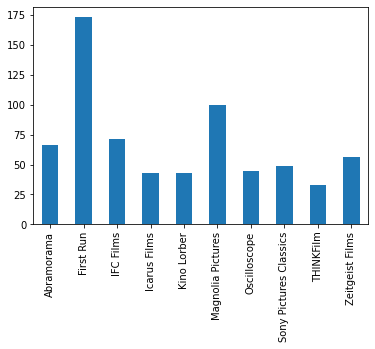

In [11]:
data['Distributor'].value_counts().head(10).sort_index().plot.bar()

<AxesSubplot:xlabel='Lifetime_Gross', ylabel='Density'>

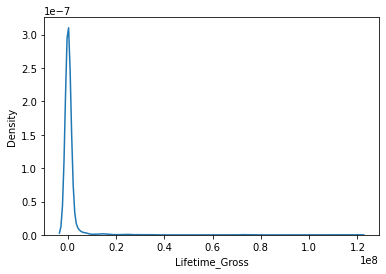

In [204]:
sns.kdeplot(x='Lifetime_Gross', data=data)

<AxesSubplot:>

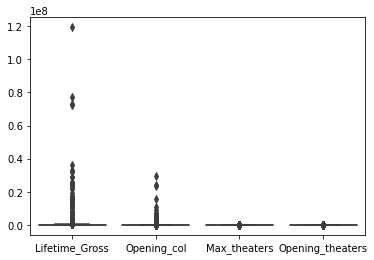

In [177]:
sns.boxplot(data=data.loc[:, ['Lifetime_Gross', 'Opening_col','Max_theaters','Opening_theaters']])

<AxesSubplot:>

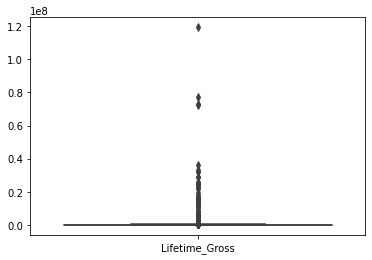

In [178]:
sns.boxplot(data=data.loc[:,['Lifetime_Gross']])

In [185]:
firstrun.describe().T

,count,mean,std,min,25%,50%,75%,max
Lifetime_Gross,173.0,44966.260116,94640.688656,476.0,4375.0,11396.0,37731.0,701278.0
Max_theaters,173.0,3.132948,3.666268,1.0,1.0,2.0,4.0,33.0
Opening_col,173.0,4513.000000,5521.495116,189.0,1483.0,2823.0,5457.0,53277.0
Opening_theaters,173.0,1.387283,1.668888,1.0,1.0,1.0,1.0,21.0
Rank,173.0,1505.184971,480.320594,276.0,1186.0,1647.0,1900.0,2054.0


In [189]:
dist_data

,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters
Distributor,,,,
1091 Pictures,294147,55,21158,3
26 Aries,9522,1,7500,1
4th Row Films,117470,14,6650,1
8x Entertainment,741557,221,309455,221
A24,8821248,560,269735,23
...,...,...,...,...
Worldplay,118206,21,4996,1
XLrator Media,117090,7,7299,2
Zeitgeist Films,11402675,451,496216,69


In [190]:
data.columns

Index(['Titles', 'Lifetime_Gross', 'Max_theaters', 'Opening_col',
       'Opening_theaters', 'Release_date', 'Distributor', 'Rank'],
      dtype='object')

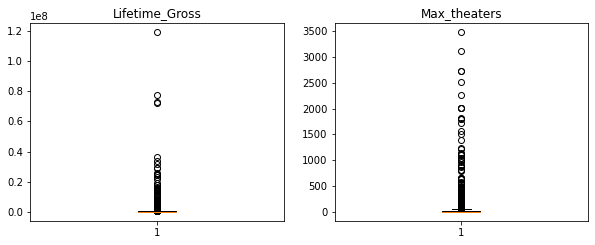

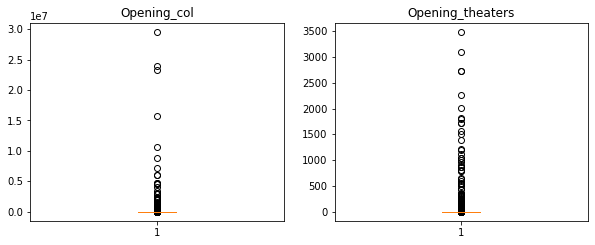

In [191]:
plt.figure(1,figsize=(10,8))

plt.subplot(2,2,1)
plt.boxplot(data['Lifetime_Gross'])
plt.title('Lifetime_Gross')

plt.subplot(2,2,2)
plt.boxplot(data['Max_theaters'])
plt.title('Max_theaters')

plt.figure(2,figsize=(10,8))

plt.subplot(2,2,1)
plt.boxplot(data['Opening_col'])
plt.title('Opening_col')

plt.subplot(2,2,2)
plt.boxplot(data['Opening_theaters'])
plt.title('Opening_theaters')

plt.show()

In [20]:
dataf =data.sort_values(['Lifetime_Gross']).head(500)
dataf

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
1695,Triumph of the Wall,476,1,430,1,2013-05-31,First Run,2054
1694,Notes on Marie Menken,577,1,577,1,2007-02-09,Icarus Films,2051
1693,Gottfried Helnwein and the Dreaming Child,601,1,402,1,2012-11-23,First Run,2050
1692,"Jesus, You Know",604,1,604,1,2004-12-03,Leisure Time Features,2049
1691,TVTV: Video Revolutionaries,812,1,556,1,2018-10-19,First Run,2048
...,...,...,...,...,...,...,...,...
1200,Peter Brook: The Tightrope,19365,2,6768,1,2014-01-31,First Run,1442
1199,Tchoupitoulas,19375,6,2379,1,2012-12-07,Oscilloscope,1441
1198,Misery Loves Comedy,19634,8,5300,1,2015-04-24,Tribeca Film,1439
1197,Trying to Get Good: The Jazz Odyssey of Jack S...,19712,1,4792,1,2008-05-30,Reel Source,1438


In [10]:
dataf =data.sort_values(['Lifetime_Gross']).head(500)
dataf.describe().T

,count,mean,std,min,25%,50%,75%,max
Lifetime_Gross,500.0,8820.720,5375.920296,476.0,4206.25,8258.0,12602.25,19740.0
Max_theaters,500.0,2.578,3.373823,1.0,1.00,2.0,3.00,45.0
Opening_col,500.0,3319.686,2730.306214,151.0,1466.00,2621.5,4450.50,28248.0
Opening_theaters,500.0,1.804,2.564124,1.0,1.00,1.0,2.00,26.0
Rank,500.0,1749.972,180.198519,1437.0,1596.75,1750.5,1908.25,2054.0


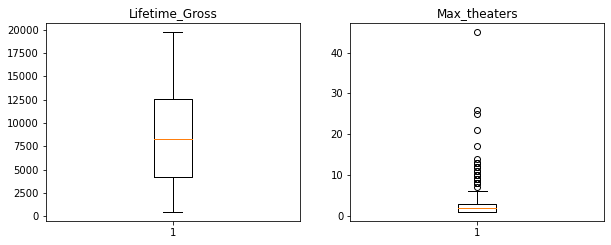

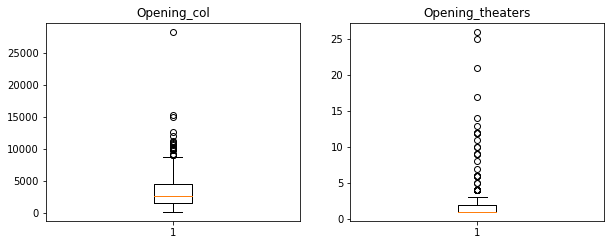

In [11]:
plt.figure(1,figsize=(10,8))

plt.subplot(2,2,1)
plt.boxplot(dataf['Lifetime_Gross'])
plt.title('Lifetime_Gross')

plt.subplot(2,2,2)
plt.boxplot(dataf['Max_theaters'])
plt.title('Max_theaters')

plt.figure(2,figsize=(10,8))

plt.subplot(2,2,1)
plt.boxplot(dataf['Opening_col'])
plt.title('Opening_col')

plt.subplot(2,2,2)
plt.boxplot(dataf['Opening_theaters'])
plt.title('Opening_theaters')

plt.show()

<AxesSubplot:>

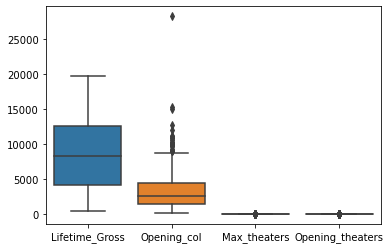

In [12]:
sns.boxplot(data=dataf.loc[:, ['Lifetime_Gross', 'Opening_col','Max_theaters','Opening_theaters']])

<AxesSubplot:xlabel='Lifetime_Gross', ylabel='Density'>

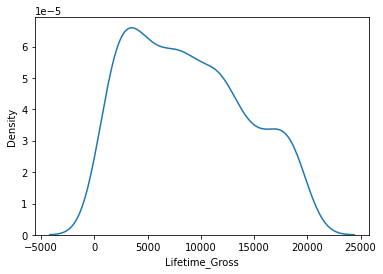

In [13]:
sns.kdeplot(x='Lifetime_Gross', data=dataf)

Text(0.5, 1.0, 'Volume')

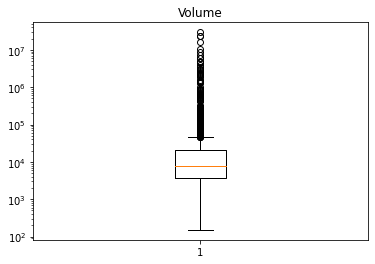

In [14]:
plt.figure()
plt.boxplot(data['Opening_col'])
plt.yscale('log')
plt.title('Volume')

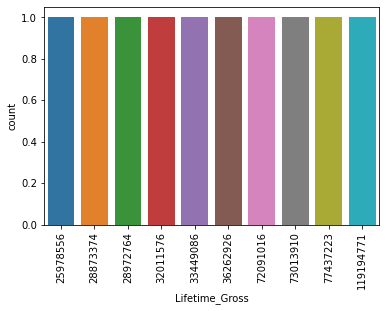

In [211]:
sns.countplot(x='Lifetime_Gross', data=data.head(10))
plt.xticks(rotation=90)
plt.show()

### Statistical Analysis

In [15]:
data.mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_28432\531903386.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_28432\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Lifetime_Gross      899898.941038
Max_theaters            58.717571
Opening_col         141330.227594
Opening_theaters        34.547170
Rank                  1020.521226
dtype: float64

In [16]:
data.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_28432\4184645713.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.median()
C:\Users\HP\AppData\Local\Temp\ipykernel_28432\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Lifetime_Gross      55403.5
Max_theaters            6.0
Opening_col          7992.0
Opening_theaters        1.0
Rank                 1014.5
dtype: float64

In [17]:
data.std()

C:\Users\HP\AppData\Local\Temp\ipykernel_28432\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


Lifetime_Gross                    5074971.159179
Max_theaters                          244.567419
Opening_col                        1267388.91968
Opening_theaters                      217.489489
Release_date        2292 days 10:11:29.057325664
Rank                                  595.076794
dtype: object

In [18]:
data.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_28432\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Lifetime_Gross      14.102214
Max_theaters         8.116311
Opening_col         16.873229
Opening_theaters     9.822335
Rank                 0.017978
dtype: float64

In [19]:
data.kurt()

C:\Users\HP\AppData\Local\Temp\ipykernel_28432\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


Lifetime_Gross      256.043075
Max_theaters         78.735996
Opening_col         326.072985
Opening_theaters    112.830410
Rank                 -1.192325
dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

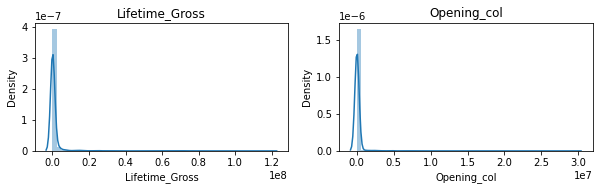

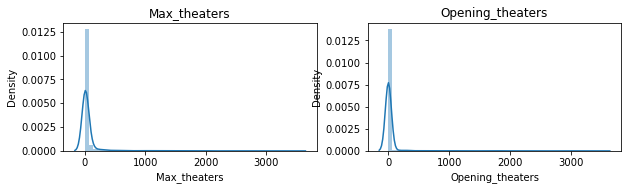

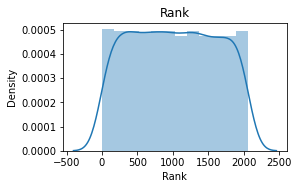

In [20]:
plt.figure(1,figsize=(10,8))

plt.subplot(3,2,1)
sns.distplot(data['Lifetime_Gross'])
plt.title('Lifetime_Gross')

plt.subplot(3,2,2)
sns.distplot(data['Opening_col'])
plt.title('Opening_col')

plt.figure(2,figsize=(10,8))

plt.subplot(3,2,1)
sns.distplot(data['Max_theaters'])
plt.title('Max_theaters')

plt.subplot(3,2,2)
sns.distplot(data['Opening_theaters'])
plt.title('Opening_theaters')

plt.figure(3,figsize=(4,8))
plt.subplot(3,1,1)
sns.distplot(data['Rank'])
plt.title('Rank')

plt.show()

### Bivariate Analysis

In [21]:
data.cov()

,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Rank
Lifetime_Gross,2.575533e+13,9.384656e+08,5.086447e+12,6.130310e+08,-8.316490e+08
Max_theaters,9.384656e+08,5.981322e+04,2.342145e+08,4.753957e+04,-4.933353e+04
Opening_col,5.086447e+12,2.342145e+08,1.606275e+12,2.180288e+08,-1.317025e+08
Opening_theaters,6.130310e+08,4.753957e+04,2.180288e+08,4.730168e+04,-2.990780e+04
Rank,-8.316490e+08,-4.933353e+04,-1.317025e+08,-2.990780e+04,3.541164e+05


In [22]:
from ipywidgets import interact,interact_manual

In [23]:
a@interact_manual
def regplot(x=data.select_dtypes('float').columns,y=data.select_dtypes('float').columns):
    sns.regplot(x=data[x],y=data[y],data=dat)

interactive(children=(Dropdown(description='x', options=(), value=None), Dropdown(description='y', options=(),…

In [24]:
@interact_manual
def relplot(x='Date',y=data.select_dtypes('float').columns):
    sns.relplot(x=data[x],y=data[y],data=data, kind='line',palette='PuBu')
    plt.xticks(rotation=90)

interactive(children=(Text(value='Date', description='x'), Dropdown(description='y', options=(), value=None), …

In [25]:
by_distributor=data.pivot_table(index=['Lifetime_Gross'],values=data.loc['Max_theaters':],aggfunc='sum')
by_distributor

,Max_theaters,Opening_col,Opening_theaters,Rank
Lifetime_Gross,,,,
476,1,430,1,2054
577,1,577,1,2051
601,1,402,1,2050
604,1,604,1,2049
812,1,556,1,2048
...,...,...,...,...
36262926,108,661185,49,5
72091016,3481,23234394,3481,4
73013910,3118,29514054,3105,3


In [26]:
by_date=data.pivot_table(index=['Release_date'],values=data.loc['Lifetime_Gross':],aggfunc='sum')
by_date

,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Rank
Release_date,,,,,
1981-04-10,2028612,309,429146,309,130
1984-10-26,10004817,1134,4009866,1127,35
1985-01-18,4210938,906,1506802,906,68
1986-01-31,90000,1,14155,1,839
1986-11-07,852676,6,14490,1,239
...,...,...,...,...,...
2019-12-13,265102,23,18422,4,482
2020-01-31,282149,53,74577,23,461
2020-02-14,134288,19,41945,2,695


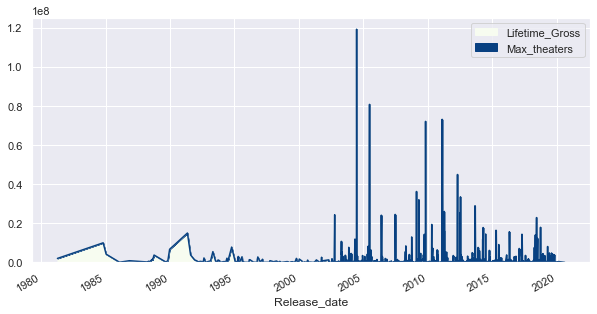

In [27]:
sns.set()
by_date.loc[:,'Lifetime_Gross':'Max_theaters'].plot.area(figsize=(10,5),cmap='GnBu')
plt.show()

In [29]:
pd.cut(data.Lifetime_Gross,[0,10000,100000,10000000,100000000]).value_counts()

(10000, 100000]          714
(100000, 10000000]       649
(0, 10000]               300
(10000000, 100000000]     32
Name: Lifetime_Gross, dtype: int64

In [30]:
range1 = data[(data['Lifetime_Gross']>0) & (data['Lifetime_Gross']<10000)]

In [31]:
range2 = data[(data['Lifetime_Gross']>10000) & (data['Lifetime_Gross']<100000)]

In [32]:
range3 = data[(data['Lifetime_Gross']>100000) & (data['Lifetime_Gross']<10000000)]

In [33]:
range4 = data[(data['Lifetime_Gross']>10000000) & (data['Lifetime_Gross']<100000000)]

In [34]:
range3

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
33,Amy,8413144,435,222500,6,2015-07-03,A24,36
34,Mad Hot Ballroom,8117961,202,45348,2,2005-05-13,Paramount Classics,37
35,Hoop Dreams,7830611,262,18396,3,1994-10-14,Fine Line Features,39
36,Expelled: No Intelligence Allowed,7720487,1052,2970848,1052,2008-04-18,Rocky Mountain Pictures,40
37,Tupac: Resurrection,7718961,804,4632847,801,2003-11-14,Paramount Pictures,41
...,...,...,...,...,...,...,...,...
677,The United States of Autism,100403,12,3413,1,2013-04-05,Janson Media,812
678,One Track Heart: The Story of Krishna Das,100401,5,11515,1,2013-05-08,Zeitgeist Films,813
679,Rejoice and Shout,100237,7,6589,1,2011-06-03,Magnolia Pictures,815
680,Bhutto,100202,4,8275,2,2010-12-03,First Run,816


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

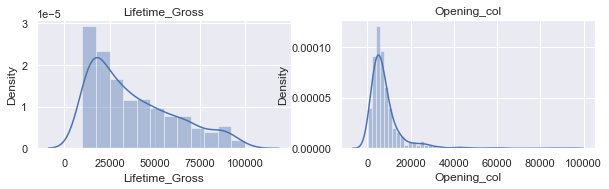

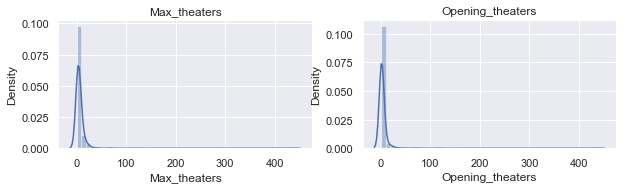

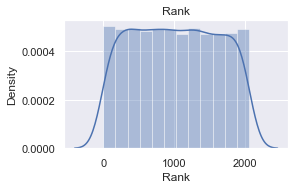

In [35]:
plt.figure(1,figsize=(10,8))

plt.subplot(3,2,1)
sns.distplot(range2['Lifetime_Gross'])
plt.title('Lifetime_Gross')

plt.subplot(3,2,2)
sns.distplot(range2['Opening_col'])
plt.title('Opening_col')

plt.figure(2,figsize=(10,8))

plt.subplot(3,2,1)
sns.distplot(range2['Max_theaters'])
plt.title('Max_theaters')

plt.subplot(3,2,2)
sns.distplot(range2['Opening_theaters'])
plt.title('Opening_theaters')

plt.figure(3,figsize=(4,8))
plt.subplot(3,1,1)
sns.distplot(data['Rank'])
plt.title('Rank')

plt.show()

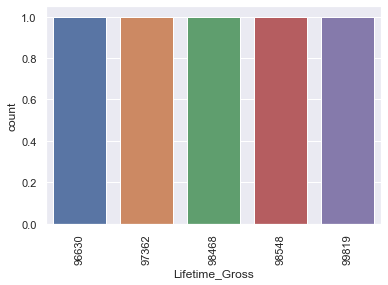

In [39]:
sns.countplot(x='Lifetime_Gross', data=range2.head())
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Lifetime_Gross', ylabel='Density'>

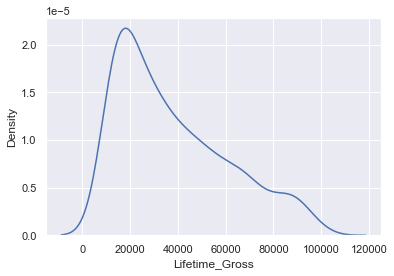

In [40]:
sns.kdeplot(x='Lifetime_Gross', data=range2)

In [41]:
by_date=data.pivot_table(index=['Release_date'],values=range2.loc['Lifetime_Gross':],aggfunc='sum')
by_date

,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Rank
Release_date,,,,,
1981-04-10,2028612,309,429146,309,130
1984-10-26,10004817,1134,4009866,1127,35
1985-01-18,4210938,906,1506802,906,68
1986-01-31,90000,1,14155,1,839
1986-11-07,852676,6,14490,1,239
...,...,...,...,...,...
2019-12-13,265102,23,18422,4,482
2020-01-31,282149,53,74577,23,461
2020-02-14,134288,19,41945,2,695


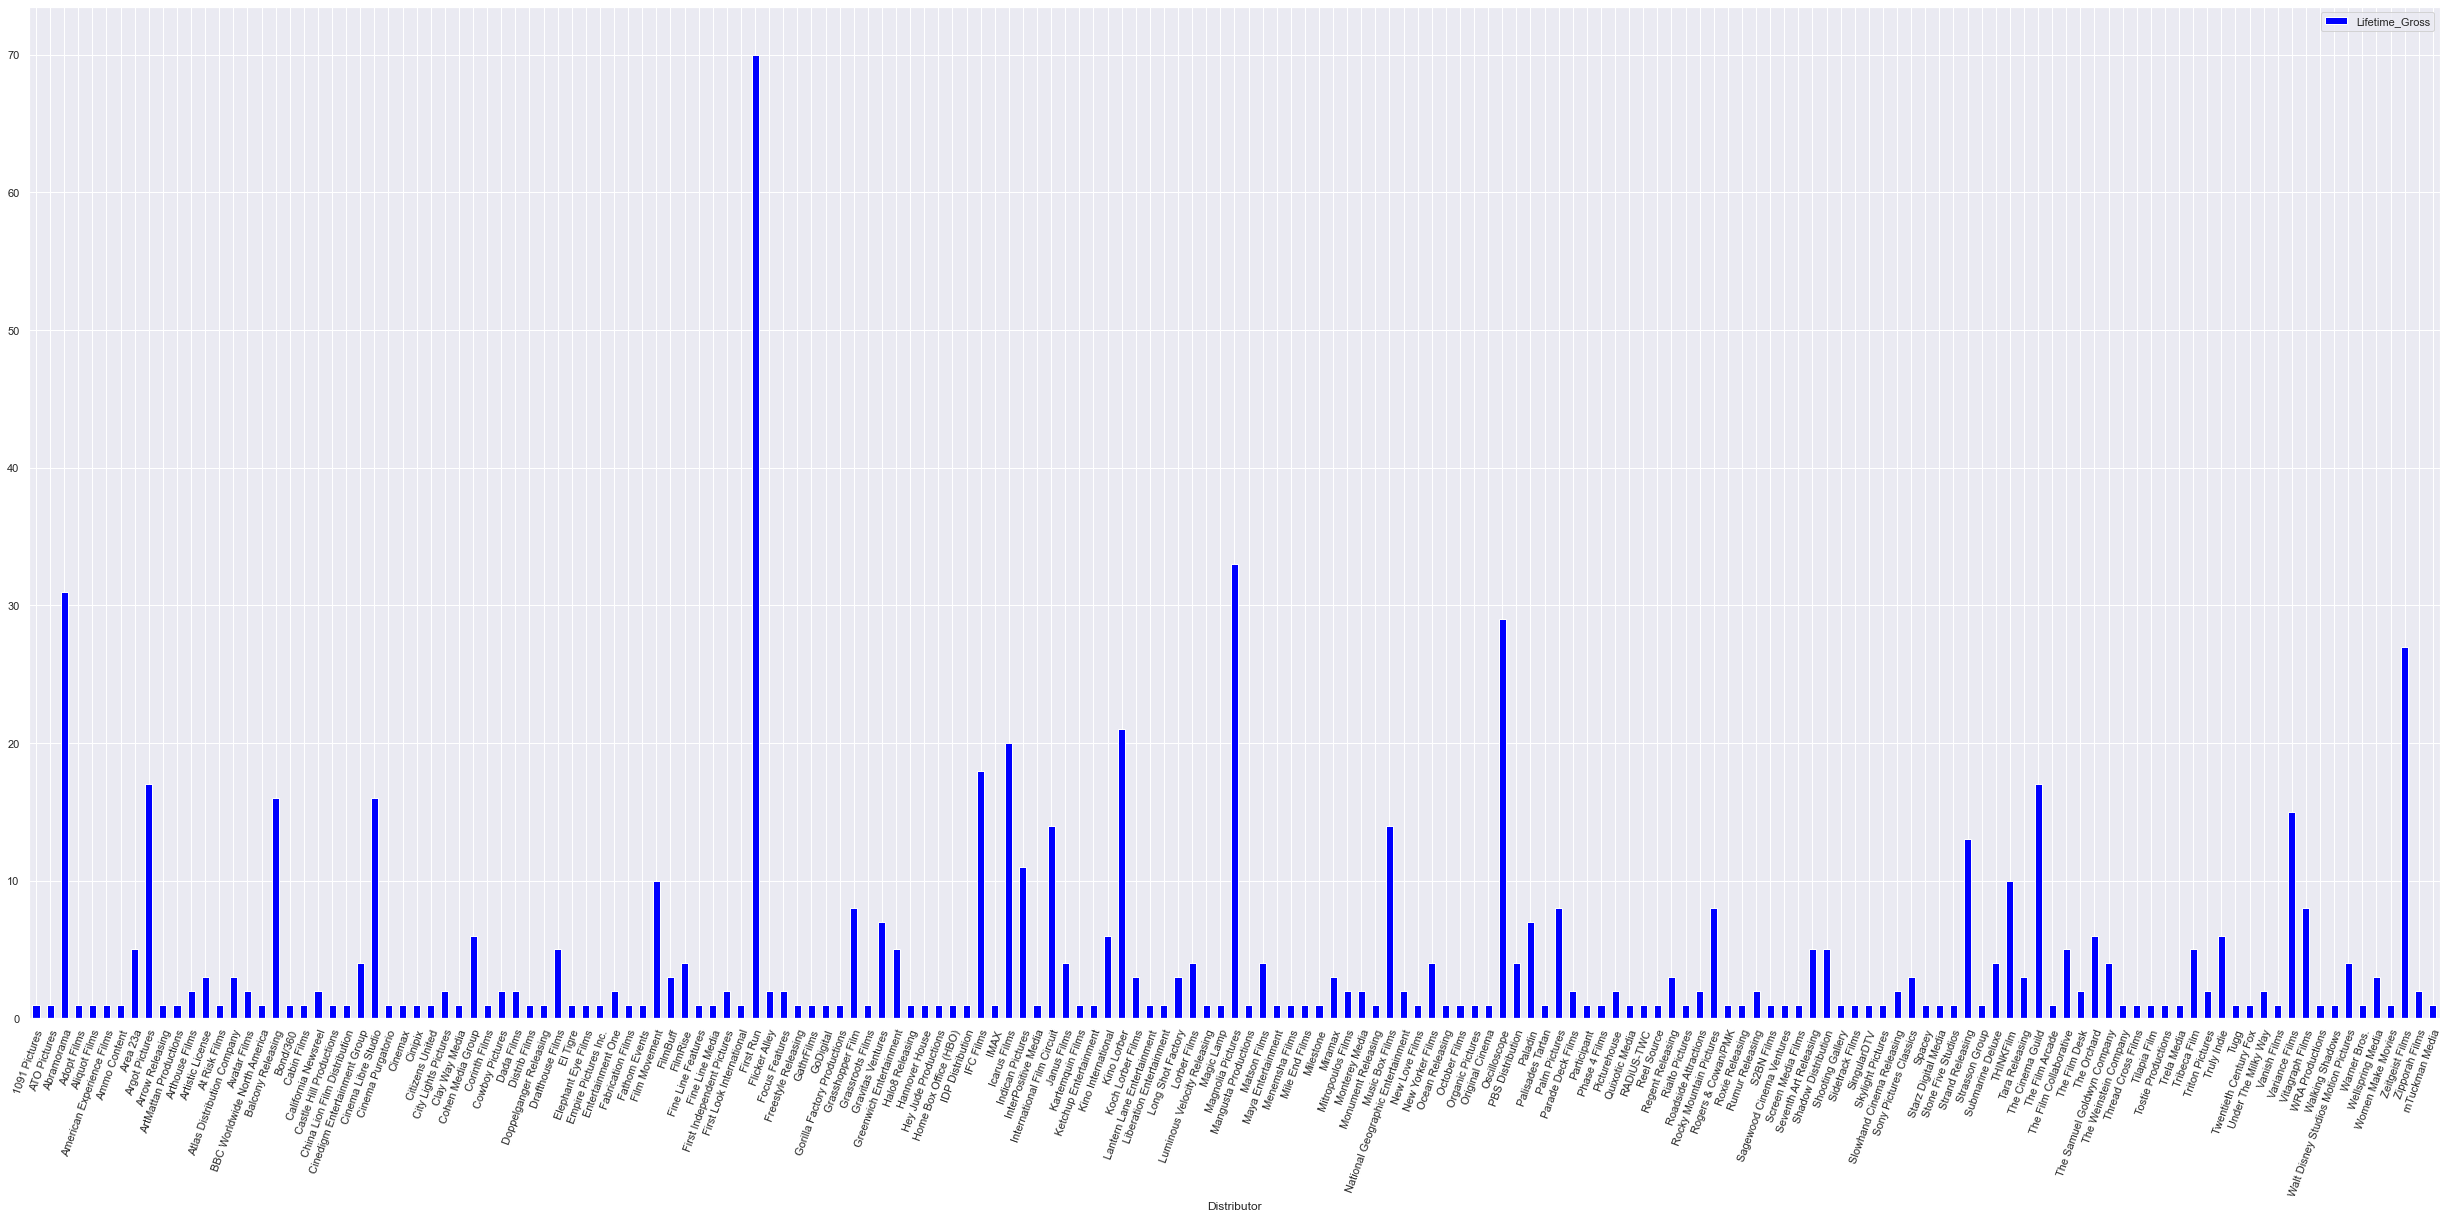

In [42]:
import matplotlib.pyplot as plt

df_sample_grouped = range2.groupby(['Distributor']).size()
n_unique_dates = len(df_sample_grouped.index.unique())

fig = plt.figure(figsize=(n_unique_dates/5, n_unique_dates/10))

ax = df_sample_grouped.plot.bar(x="Release_date", y="Distriibutor", color='blue')
ax.set_xticklabels(labels=df_sample_grouped.index, rotation=70, rotation_mode="anchor", ha="right");
ax.legend(labels=['Lifetime_Gross']);

plt.tight_layout()

# Multivariate Analysis

In [43]:
range2.describe().T

,count,mean,std,min,25%,50%,75%,max
Lifetime_Gross,714.0,38098.990196,23308.876778,10042.0,18511.50,31564.0,53275.25,99819.0
Max_theaters,714.0,6.436975,17.894253,1.0,2.00,4.0,6.00,438.0
Opening_col,714.0,8275.322129,8574.315813,151.0,3960.50,6068.5,9259.00,93000.0
Opening_theaters,714.0,3.735294,17.779425,1.0,1.00,1.0,2.00,438.0
Rank,714.0,1248.280112,251.108935,818.0,1028.25,1247.5,1463.25,1688.0


<AxesSubplot:>

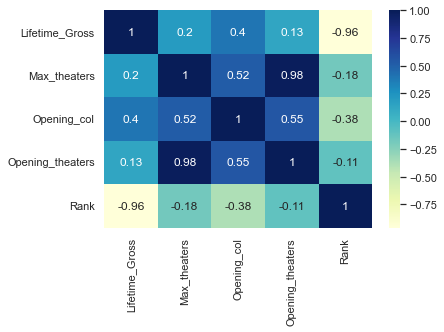

In [36]:
sns.heatmap(range2.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:>

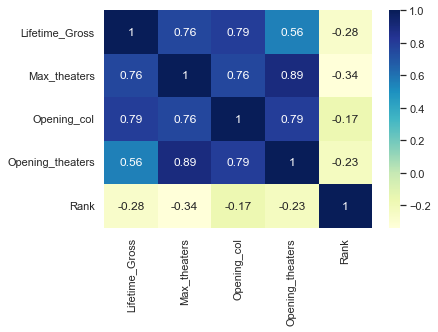

In [37]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [38]:
data

,Titles,Lifetime_Gross,Max_theaters,Opening_col,Opening_theaters,Release_date,Distributor,Rank
0,Fahrenheit 9/11,119194771,2011,23920637,868,2004-06-23,Lionsgate,1
1,March of the Penguins,77437223,2506,137492,4,2005-06-24,Warner Independent Pictures (WIP),2
2,Justin Bieber: Never Say Never,73013910,3118,29514054,3105,2011-02-11,Paramount Pictures,3
3,This Is It,72091016,3481,23234394,3481,2009-10-28,Sony Pictures Entertainment (SPE),4
4,Under the Sea 3D,36262926,108,661185,49,2009-02-13,Warner Bros.,5
...,...,...,...,...,...,...,...,...
1691,TVTV: Video Revolutionaries,812,1,556,1,2018-10-19,First Run,2048
1692,"Jesus, You Know",604,1,604,1,2004-12-03,Leisure Time Features,2049
1693,Gottfried Helnwein and the Dreaming Child,601,1,402,1,2012-11-23,First Run,2050
1694,Notes on Marie Menken,577,1,577,1,2007-02-09,Icarus Films,2051


<AxesSubplot:>

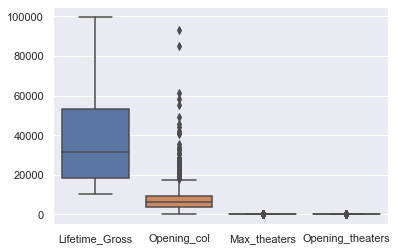

In [44]:
sns.boxplot(data=range2.loc[:, ['Lifetime_Gross', 'Opening_col','Max_theaters','Opening_theaters']])